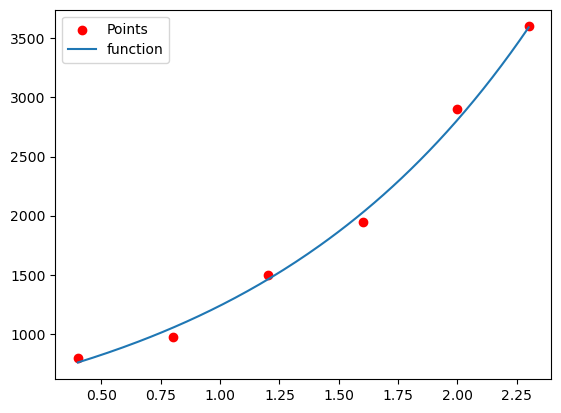

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import diff, solve, Eq, symbols, integrate
# Task 1
# y = a * (10 ** (bx))
# log10(y) = c + bx
# f_solution = 10 ** (c+bx)

nodes = np.array([0.4, 0.8, 1.2, 1.6, 2.0, 2.3])
values = np.array([800.0, 975, 1500, 1950, 2900, 3600])

c, b = symbols('c, b')

def f(x):
    return c + b*x


phi = 0
for i in range(nodes.size):
    phi += (f(nodes[i]) - np.log10(values[i]))**2

diffC = diff(phi, c)
diffB = diff(phi, b)

solution = solve([Eq(diffC, 0), Eq(diffB, 0)])

def f_solution(x):
    return 10 ** (solution[c] + solution[b] * x)

plt.scatter(nodes, values, color='red')

x_axis = np.linspace(0.4, 2.3, 150)
plt.plot(x_axis, f_solution(x_axis))
plt.legend(['Points', 'function'])
plt.show()

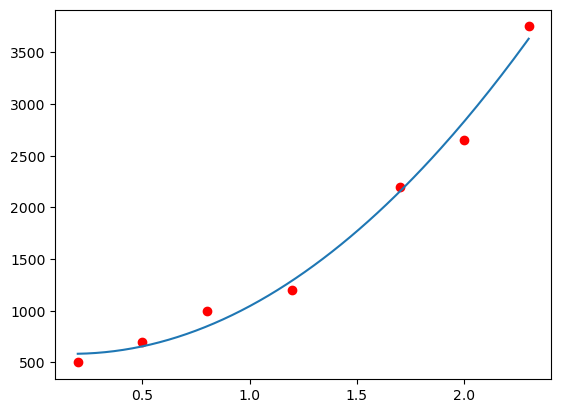

In [19]:
# Task 2
# Във векторно матрична форма

n = 3
nodes = np.array([0.2, 0.5, 0.8, 1.2, 1.7, 2, 2.3])
values = np.array([500, 700, 1000, 1200, 2200, 2650, 3750])

def generate_row(startPoint):
    row = []
    endPoint = startPoint + n
    for i in range(startPoint, endPoint):
        sum = 0
        for j in range(nodes.size):
            sum += nodes[j] ** i
        row.append(sum)
    return row

left_side = []

for i in range(n):
    left_side.append(generate_row(i))

right_side = []

for i in range(n):
    sum = 0
    for j in range(nodes.size):
        sum += values[j] * (nodes[j] ** i)
    right_side.append(sum)

solution = np.linalg.solve(left_side, right_side)

def f_solution(x):
    return solution[0] + solution[1]*x + solution[2]*(x**2)

plt.scatter(nodes, values, color='red')
x_axis = np.linspace(0.2, 2.3, 150)
plt.plot(x_axis, f_solution(x_axis))
plt.show()

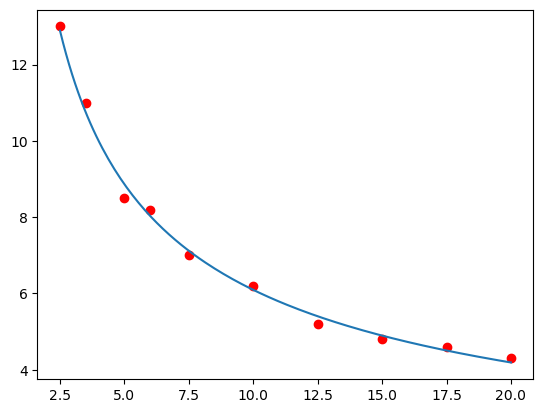

In [23]:
# Task 3
import math
# y = a*(x**b)
# lny = c + b*ln(x)
# y = e ** (c+b*bln(x))
nodes = np.array([2.5, 3.5, 5, 6, 7.5, 10, 12.5, 15, 17.5, 20])
values = np.array([13, 11, 8.5, 8.2, 7, 6.2, 5.2, 4.8, 4.6, 4.3])

c, b = symbols('c, b')

def f(x):
    return c + b*np.log(x)

phi = 0

for i in range(nodes.size):
    phi += (f(nodes[i]) - np.log(values[i]))**2

diffC = diff(phi, c)
diffB = diff(phi, b)

solution = solve([Eq(diffC, 0), Eq(diffB, 0)])

def f_solution(x):
    return math.e**(solution[c] + solution[b]*np.log(x))

plt.scatter(nodes, values, color='red')
x_axis = np.linspace(2.5, 20, 150)
plt.plot(x_axis, f_solution(x_axis))
plt.show()

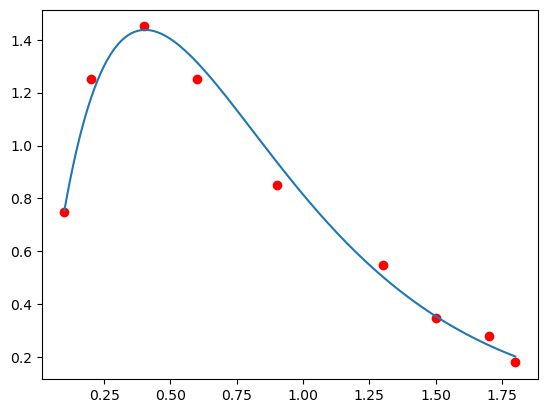

In [25]:
# Task 4

# y = a*x*e**(bx)
# lny = lnx + c + bx

nodes = np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.3, 1.5, 1.7, 1.8])
values = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.28, 0.18])

c, b = symbols('c, b')

def f(x):
    return np.log(x) + c + b * x

phi = 0

for i in range(nodes.size):
    phi += (f(nodes[i]) - np.log(values[i]))**2

diffC = diff(phi, c)
diffB = diff(phi, b)

solution = solve([Eq(diffC, 0), Eq(diffB, 0)])

def f_solution(x):
    return math.e ** (np.log(x) + solution[c] + solution[b]*x)

plt.scatter(nodes, values, color='red')
x_axis = np.linspace(0.1, 1.8, 150)
plt.plot(x_axis, f_solution(x_axis))
plt.show()

In [42]:
# Task 5
import scipy as sp
n = 5

def f(x):
    return (math.e**math.sin(0.5*x + 0.5)) / 2 - 0.25 * (x**2) - 0.5*x - 0.25

A1, x1, A2, x2, A3, x3, x = symbols('A1, x1, A2, x2, A3, x3, x')

solution = solve([
    Eq(A1 + A2 + A3, integrate(1, (x, -1, 1))),
    Eq(A1*x1 + A2*x2 + A3*x3, integrate(x, (x, -1, 1))),
    Eq(A1*(x1**2) + A2*(x2**2) + A3*(x3**2), integrate(x**2,(x, -1, 1))),
    Eq(A1*(x1**3) + A2*(x2**3) + A3*(x3**3), integrate(x**3,(x, -1, 1))),
    Eq(A1*(x1**4) + A2*(x2**4) + A3*(x3**4), integrate(x**4,(x, -1, 1))),
    Eq(A1*(x1**5) + A2*(x2**5) + A3*(x3**5), integrate(x**5,(x, -1, 1))),
])
total = solution[0][A1] * f(solution[0][x1]) + solution[0][A2] * f(solution[0][x2]) + solution[0][A3] * f(solution[0][x3])
print(total)

def f_real(x):
    return math.e**(math.sin(x)) - 2*(x**2)

print(sp.integrate.quad(f_real, 0, 1))

0.965182562097715
(0.9652029417513845, 1.071590529368321e-14)


In [58]:
# Task 6
a = -1
b = 1
n = 4
h = (b-a) / n

x = symbols('x')

def f(x):
    return 1-(x**4)

nodes = []

for i in range(n+1):
    nodes.append(a + i*h)
print(nodes)
sum = 0
for i in range(1, n+1):
    sum += (f(nodes[i-1]) + f(nodes[i]))

total = sum*((b-a)/(2*n))
print(total)

[-1.0, -0.5, 0.0, 0.5, 1.0]
1.4375


In [72]:
# Task 7
a = 0
b = 0.4
n = 4
h = (b-a)/n

values = {0:1, 0.05: 4.5, 0.1:8, 0.15:6, 0.2:4, 0.25:3.75, 0.3:3.5, 0.35:4.25, 0.4:5}
nodes = []

for i in range(n+1):
    nodes.append(round(a + i*h, 2))

sum = 0
for i in range(1, n+1):
    sum += values[nodes[i-1]] + 4*values[round(((nodes[i-1] + nodes[i])/2),2)] + values[nodes[i]]

total = sum * ((b-a)/(6*n))
print(total)

1.8499999999999999
